首先，说点完全看不懂的吧。就是最前面的公式推导。为什么最后下面的公式，我是完全看不懂。
因为这些涉及的都是一些矩阵的运算。这个我看的云里雾里。

- 这些都是线性代数的表达。$y=4*x_0+3*x_1$

$\begin{bmatrix}3 & 4\end{bmatrix}*\begin{bmatrix}x_0 & x_1\end{bmatrix}$

- 这里的成本函数，其实我还不是太理解。我开始以为，只是简单的做了一个线性拟合。其实其他来讲，就是在处理线性拟合。
    - MSE(方差)：这个实践中，用的最多。
    - RMSE(均方根差)：
    - 从统计学上来说，MSE最小，就是穿过的划的线和实际的点之间的距离差最小。
    - 然后这里，是一个性能指标。而这个**性能最好**，就表示，**成本最低**
- `theta_best`这个是求出来的成本函数。但是这里就是一条线，串起来所有点的方案。
- `X`：其实这里，求的$x_1$
- `X_b`: 是如下的矩阵。$\begin{bmatrix}x_0 & x_1\end{bmatrix}$，然后$x_0$,永远是1



In [2]:
import numpy as np


X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)),X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.95685224],
       [2.89438349]])

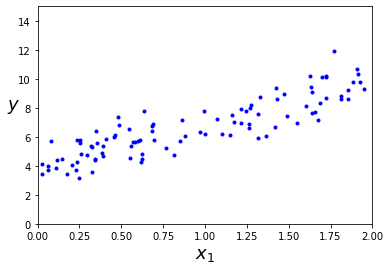

In [3]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.95685224],
       [9.74561922]])

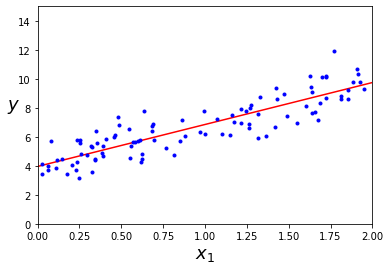

In [5]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.95685224]), array([[2.89438349]]))

## 梯度

关于梯度，简单的来说，就是越接近最低点。那么其数据就越小。这个具体的展开，最好看看高数。这里展开其实没有太大的意义的。

就程序层面说，我总结了以下几点

- 所有的公式的推导都是黑盒。拿来用就好
- 其实到这里，很多都是线性代数用的地方。
- numpy关于线性代数的api来弄

三个梯度下降的区别。
- 批量：用的全集
- 随机：随机挑一个数据点来算，可以用`SGDRegressor`
- 小批量： 随机挑几个。

用猜，其实也明白这些的区别在哪里了。
- 批量的**全**，但是**慢**，
- 随机的话**快**，但是容易产生**偏执**。就像是文中说的容易陷入局部最小值。
- 小批量**两者之间**

到底哪个好，我觉得看成本。至少到目前位置。我个人觉得，其实这个预测的本质，还是找方向，而不是找点。
所以来说很多东西就没有那么确定了。

核外的意思是数据集之外。

说道现在$\theta_0$和$\theta_1$。求的还是这些估算点之间的关系。也就是从x到y的方程。  
而成本函数，其实就是预测值和Y的差。

然后第一方法，就是通过数学公式算出来。

梯度下降则是通过方式试出来。三种方式，本质就是算每次的变化量的区别。


In [7]:
def plot_views(x_arr=X,y_arr=y,theta_array=[],axis_config = [0, 2, 0, 15]):
    
    for theta_value in theta_array:
        x_value = np.array([[0],[2]])
        x_matrix = np.c_[np.ones((2,1)),X_new]
        y_value = x_matrix.dot(theta_value)
        plt.plot(x_value,y_value,"r-")
    plt.plot(x_arr,y_arr,"b.")
    plt.xlabel("$X_1$")
    plt.ylabel("$y$")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis(axis_config)
    plt.show()

In [8]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
thetas = []
for iterator in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    if iterator % 200 == 0:
        thetas.append(theta)
    
theta

array([[3.95685224],
       [2.89438349]])

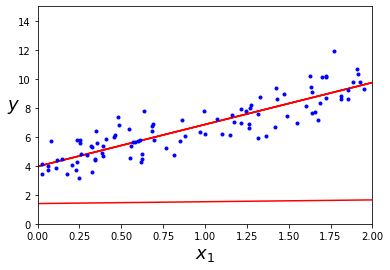

In [9]:
plot_views(theta_array= thetas)

## 多项式回归

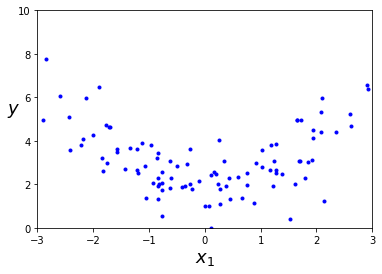

In [10]:
m = 100 
X = 6* np.random.rand(m,1)-3
y = 0.5* X**2 + 2 + np.random.randn(m,1)
plot_views(x_arr=X,y_arr=y,axis_config=[-3,3,0,10])

In [11]:
from sklearn.preprocessing import PolynomialFeatures
ploy_features = PolynomialFeatures(degree=2,include_bias=False)
X_ploy = ploy_features.fit_transform(X)

下面的红色和绿色完全重合。其实这样也挺好理解的。因为本质来说，是列1，和列2.

然后这下一个cell也验证了我的理解。本质来说，其只是做了以下计算。

然后多项式，本质就是把多项式，变成**矩阵形式**的线性回归。

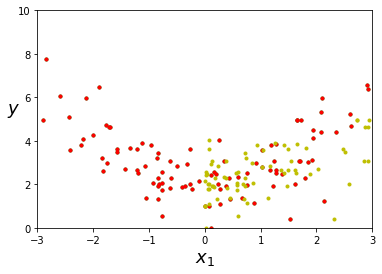

In [12]:
plt.plot(X,y,"g.")
plt.plot(X_ploy[:,0],y,"r.")
plt.plot(X_ploy[:,1],y,"y.")
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [13]:
X_ploy[:,0]**2 - X_ploy[:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### PolynomialFeatures遭成特征爆炸

就书上的说法，我的理解是，n个特征，到d的degree的特征都来一遍。比如书中的例子$a^2,a^3,b^2,b^3$。
还会添加$ab,a^2b$这类，所有的项目，简单的说，就是所有的幂的数据都来一遍排列组合。

所以他也就加大了，特征之间的关系。有时候可以用这种方法来看看**特征之间的关系**

然后书上面的个数有点小错误。个数是$\frac{(n+d)!}{n!d!}$,具体解法，在[这个里面](https://blog.csdn.net/tsinghuahui/article/details/80229299)

简单来说，就是$1^{a_0}x_1^{a_1}x_2^{a_2}...x_n^{a_n}$

然后$a_0+a_1+a_2...+a_n = d $.

上面的组合有n个。后面的概率论的数据我就不知道了

# 学习曲线

1. PipeLine也能一个模型？
2， 发觉每次的图，差别还是挺大的。

蓝线是训练的误差。红线是测试的误差。这个不一样，就表示是否过度拟合。

也可以从侧面就可以看出，数据多少开始就不用数据了。

然后就是验证学习的方法。

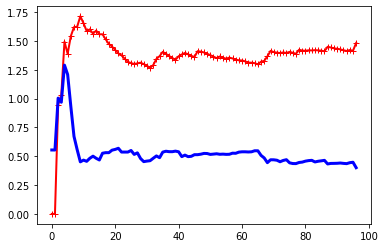

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
˚
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=2)
    train_errors, val_errors=[],[]
    for m in range(1,len(X_train)): 
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

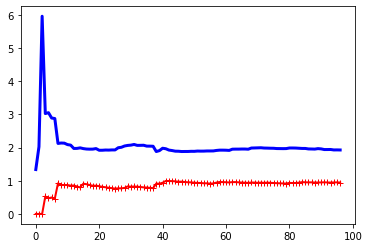

In [23]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_feature",PolynomialFeatures(degree=2,include_bias=False)),
    ("sdg_reg",LinearRegression())
))

plot_learning_curves(polynomial_regression,X,y)